<span style="font-family:serif; font-size: 20px;">&nbsp;&nbsp;&nbsp; Mai intai, vom incepe cu citirea datelor dintr-un fisier Excel si adaugarea lor intr-un dataframe. Mai apoi, vom verifica valorile lipsa din fiecare celula, cat si duplicatele. In cazul in care exista duplicate, le vom sterge. </span>

In [281]:
import pandas as pd

df = pd.read_excel('./Dataset/Dataset.xlsx')

# Calcularea numarului de valori lipsa din dataframe
num_of_missing_values = df.isnull().sum().sum()
print(f'Numarul valorilor lipsa este: {num_of_missing_values}\n')

# Calcularea numarului duplicatelor
duplicates = df[df.duplicated()]
print(f"Numarul instantelor duplicate sunt: {duplicates.shape[0]}")

# Stergerea duplicatelor
df.drop_duplicates(inplace = True) # inplace = True indica faptul ca fuctia va sterge duplicate din dataframe-ul dat si nu va return unul nou



Numarul valorilor lipsa este: 0

Numarul instantelor duplicate sunt: 4


<span style="font-family:serif; font-size: 20px;">&nbsp;&nbsp;&nbsp; Urmeaza sa verificam daca datele sunt formatate corect. Celulele cu date în format greșit pot face dificilă, sau chiar imposibilă, analizarea datelor.
<br><br>
&nbsp;&nbsp;&nbsp; Pentru a corecta această problemă, avem două opțiuni: fie eliminam rândurile sau coloanele respective, fie convertim toate celulele din coloane într-un format uniform. </span>


In [282]:
def check_wrong_format(column_name, possible_values):
    wrong_values = [value for value in df[column_name] if value not in possible_values]

    freq_wrong_values = {}
    if len(wrong_values) > 0:
        print(f'Numarul valorilor incorecte pentru coloana "{column_name}" este: {len(wrong_values)}')

        for value in wrong_values:
            freq_wrong_values[value] = freq_wrong_values.get(value, 0) + 1

        print('Valorile incorecte sunt: ' + ', '.join(freq_wrong_values.keys()), '\n')


column_names = ['Gender', 'Age', 'Race', 'Number of cats in the household', 'Type of housing', 'Zone']

# Parcurgem coloana 'Gender'
possible_values = ['F', 'M']
check_wrong_format(column_names[0], possible_values)

# Parcurgem coloana 'Age'
possible_values = ['Less than 1 year', '1-2 years', '2-10 years', 'More than 10 years']
check_wrong_format(column_names[1], possible_values)

# Parcurgem coloana 'Race'
possible_values = ['Bengal', 'Birman', 'British Shorthair', 'Chartreux', 'European', 'Maine coon', 'Persian', 'Ragdoll', 'Savannah', 'Sphynx', 'Siamese', 'Turkish angora', 'No breed', 'Other', 'Unknown']
check_wrong_format(column_names[2], possible_values)

# Parcurgem coloana 'Number of cats in the household'
possible_values = [1, 2, 3, 4, 5]
check_wrong_format(column_names[3], possible_values)

# Parcurgem coloana 'Type of housing'
possible_values = ['Apartment without balcony', 'Apartment with balcony or terrace', 'House in a subdivision', 'Individual house zone']
check_wrong_format(column_names[4], possible_values)

# Parcurgem coloana 'Zone'
possible_values = ['Urban', 'Rural', 'Periurban']
check_wrong_format(column_names[5], possible_values)

possible_values = [0, 1, 2, 3, 4]
column_names += ['Time spent outside each day', 'Time spent with the owner each day', 'The abundance of natural areas (tree, bushes, grass, etc.)', 'The frequency at which the cat captures birds', 'The frequency at which the cat captures small mammals (mice, field mice, shrew)']
for i in range(6, len(column_names)):
    check_wrong_format(column_names[i], possible_values)

rest_of_the_columns = [value for value in df.columns if value not in column_names]
for column_name in rest_of_the_columns:
    check_wrong_format(column_name, [1, 2, 3, 4, 5])


Numarul valorilor incorecte pentru coloana "Gender" este: 6
Valorile incorecte sunt: Unknown 

Numarul valorilor incorecte pentru coloana "The abundance of natural areas (tree, bushes, grass, etc.)" este: 3139
Valorile incorecte sunt: Unknown, 3, 2, 1 



<span style="font-family:serif; font-size: 20px;">&nbsp;&nbsp;&nbsp;  Se observă că, în cazul variabilei "Gender", pe lângă valorile "Feminin" și "Masculin", există și un "Unknown". Deoarece această valoare nu oferă informații relevante despre clasificarea pisicilor, și numărul acestor valori este redus (doar 6), putem considera eliminarea rândurilor care conțin această valoare fără a afecta semnificativ integritatea setului de date. Această abordare va simplifica analiza ulterioară și va evita includerea datelor irelevante.</span>
<br>
<br>
<span style="font-family:serif; font-size: 20px;">&nbsp;&nbsp;&nbsp; De asemenea, avem si un atribut care se referă la gradul  de accesibilitate a pisicii la natură sau exterior.Acesta conține atât valori numerice (1, 2, 3), cât și un string ("Unknown"). Pentru a păstra coerența și pentru a simplifica procesarea, ar fi ideal să uniformizăm tipul de date în acest atribut, asigurându-ne că toate valorile urmează același format. 
<br>
&nbsp;&nbsp;&nbsp; Intrucat "Unknown" reprezintă un număr destul de mare de instanțe, aceste rânduri nu ar trebui eliminate din setul de date pentru a asigura relevanța. In schimb, putem inlocui stringului "Unknown" cu o valoare numerică reprezentativă, de exemplu 0. </span>

In [283]:
# Inlocuieste valorile "Unknown" cu 0
df['The abundance of natural areas (tree, bushes, grass, etc.)'] = df['The abundance of natural areas (tree, bushes, grass, etc.)'].replace('Unknown', 0)

# Transforma coloana in tip numeric 
df['The abundance of natural areas (tree, bushes, grass, etc.)'] = pd.to_numeric(df['The abundance of natural areas (tree, bushes, grass, etc.)'])

# Verificam modificarile
print(df['The abundance of natural areas (tree, bushes, grass, etc.)'].unique())


[0 3 2 1]


<span style="font-family:serif; font-size: 20px;">&nbsp;&nbsp;&nbsp; Mai departe, parcurgem toate atributele si determinam frecventa fiecarei valoare relativ la clasa carei ii apartine. </span>

In [284]:
from IPython.display import display

# Parcurgem fiecare coloana din DataFrame
for column_name in df.columns:
    counts = df[column_name].value_counts()
    
    # creaza un DataFrame pentru valorile unice si frecventele lor
    result_df = pd.DataFrame(counts).reset_index()
    result_df.columns = ['Valoare', 'Frecvență']  # schimba numele coloanelor

    # Afisarea tabelului
    print(f"Tabel pentru coloana: {column_name}")
    display(result_df)


Tabel pentru coloana: Gender


,Valoare,Frecvență
0,M,1649
1,F,1484
2,Unknown,6


Tabel pentru coloana: Age


,Valoare,Frecvență
0,2-10 years,1559
1,1-2 years,617
2,Less than 1 year,607
3,More than 10 years,356


Tabel pentru coloana: Race


,Valoare,Frecvență
0,European,1020
1,No breed,483
2,Bengal,238
3,Ragdoll,217
4,Maine coon,198
5,Birman,192
6,Persian,192
7,British Shorthair,166
8,Other,135
9,Unknown,79


Tabel pentru coloana: Number of cats in the household


,Valoare,Frecvență
0,1,1280
1,2,972
2,3,364
3,5,321
4,4,202


Tabel pentru coloana: Type of housing


,Valoare,Frecvență
0,Individual house zone,998
1,House in a subdivision,988
2,Apartment with balcony or terrace,784
3,Apartment without balcony,369


Tabel pentru coloana: Zone


,Valoare,Frecvență
0,Rural,1224
1,Urban,1099
2,Periurban,816


Tabel pentru coloana: Time spent outside each day


,Valoare,Frecvență
0,0,1311
1,2,796
2,1,624
3,3,374
4,4,34


Tabel pentru coloana: Time spent with the owner each day


,Valoare,Frecvență
0,2,1980
1,3,827
2,1,323
3,0,9


Tabel pentru coloana: Shy


,Valoare,Frecvență
0,1,1080
1,4,702
2,2,647
3,3,437
4,5,273


Tabel pentru coloana: Calm


,Valoare,Frecvență
0,4,1172
1,5,677
2,2,542
3,3,528
4,1,220


Tabel pentru coloana: Skittish


,Valoare,Frecvență
0,1,1003
1,3,814
2,2,678
3,4,439
4,5,205


Tabel pentru coloana: Intelligent


,Valoare,Frecvență
0,5,1327
1,4,1263
2,3,350
3,2,136
4,1,63


Tabel pentru coloana: Vigilant


,Valoare,Frecvență
0,4,1212
1,5,1044
2,3,477
3,2,275
4,1,131


Tabel pentru coloana: Tenacious


,Valoare,Frecvență
0,4,1114
1,5,1044
2,3,610
3,2,255
4,1,116


Tabel pentru coloana: Affectionate


,Valoare,Frecvență
0,5,1500
1,4,992
2,3,352
3,2,212
4,1,83


Tabel pentru coloana: Friendly


,Valoare,Frecvență
0,4,1048
1,5,733
2,3,522
3,2,505
4,1,331


Tabel pentru coloana: Loner


,Valoare,Frecvență
0,2,829
1,1,813
2,4,680
3,3,604
4,5,213


Tabel pentru coloana: Ferocious


,Valoare,Frecvență
0,1,1745
1,2,604
2,3,436
3,4,273
4,5,81


Tabel pentru coloana: Territorial


,Valoare,Frecvență
0,1,1000
1,3,720
2,4,587
3,2,570
4,5,262


Tabel pentru coloana: Aggressive


,Valoare,Frecvență
0,1,1165
1,3,865
2,2,570
3,4,368
4,5,171


Tabel pentru coloana: Impulsive


,Valoare,Frecvență
0,1,1008
1,3,687
2,2,674
3,4,585
4,5,185


Tabel pentru coloana: Predictable


,Valoare,Frecvență
0,4,1275
1,3,785
2,5,428
3,2,374
4,1,277


Tabel pentru coloana: Inattentive


,Valoare,Frecvență
0,4,894
1,3,890
2,2,558
3,1,430
4,5,367


Tabel pentru coloana: The abundance of natural areas (tree, bushes, grass, etc.)


,Valoare,Frecvență
0,3,1335
1,2,851
2,1,713
3,0,240


Tabel pentru coloana: The frequency at which the cat captures birds


,Valoare,Frecvență
0,0,2274
1,1,496
2,2,196
3,3,116
4,4,57


Tabel pentru coloana: The frequency at which the cat captures small mammals (mice, field mice, shrew)


,Valoare,Frecvență
0,0,2147
1,1,404
2,2,208
3,4,196
4,3,184


<span style="font-family:serif; font-size: 20px;">&nbsp;&nbsp;&nbsp; Din tabelele de mai sus, se observă că frecvențele valorilor unice ale atributelor sunt adesea foarte diferite, indicând un dezechilibru în setul de date. Dacă valorile atributelor sunt relevante pentru context, ar fi recomandat să aplicăm tehnici de oversampling pentru categoriile rare sau undersampling pentru cele frecvente. De exemplu, în cazul variabilei "Age", categoria de vârstă cea mai frecventă este între 1 și 2 ani, cu 1559 de pisici, în timp ce celelalte categorii au frecvențe sub 620.
<br>
<br>
&nbsp;&nbsp;&nbsp; Pentru atributele care măsoară gradul unei caracteristici pe o scară de la 1 la 5 (de exemplu: "Timid", "Calm", etc.), este esențial să păstrăm toate nivelurile pentru a realiza o clasificare cât mai robustă. Aceasta ne permite să capturăm nuanțele comportamentale și să îmbunătățim precizia analizei.
</span>

In [285]:
# Se selectează doar coloanele numerice
numeric_df = df.select_dtypes(include=['number'])

# Se calculeaza matricea de corelatie
correlation_matrix = numeric_df.corr()

# Se extrag corelatiile puternice
strong_corr = correlation_matrix[(correlation_matrix >= 0.5) | (correlation_matrix <= -0.5)]

# Se creaza un DataFrame din corelatiile puternice, eliminând NaN
strong_corr_df = strong_corr.stack().reset_index()
strong_corr_df.columns = ['Variabila1', 'Variabila2', 'Corelatie']

# Se exclud corelatiile dintre aceleasi variabile
strong_corr_df = strong_corr_df[strong_corr_df['Variabila1'] != strong_corr_df['Variabila2']]

# Se exclud duplicatul perechilor (var1, var2) și (var2, var1)
strong_corr_df = strong_corr_df[strong_corr_df['Variabila1'] > strong_corr_df['Variabila2']]

# Se afiseaza tabelul
display(strong_corr_df)

,Variabila1,Variabila2,Corelatie
2,Time spent outside each day,The frequency at which the cat captures birds,0.558640
3,Time spent outside each day,The frequency at which the cat captures small ...,0.608313
11,Vigilant,Intelligent,0.516582
13,Tenacious,Intelligent,0.521882
29,The frequency at which the cat captures small ...,The frequency at which the cat captures birds,0.768187


<span style="font-family:serif; font-size: 20px;">&nbsp;&nbsp;&nbsp; În tabelul de mai sus, se observă că nu există multe corelații între variabile, iar cele existente sunt relativ slabe. Cea mai mare corelație, de 0.7681, este logică, deoarece atunci când pisicile vânează mai frecvent mamifere mici (precum șoarecii), acest lucru duce și la o creștere a frecvenței cu care vânează păsările.</span>

<span style="font-family:serif; font-size: 20px;">&nbsp;&nbsp;&nbsp; În continuare, vom converti valorile non-numerice în valori numerice, pentru a putea crea reprezentări histogramice și boxplot pentru fiecare atribut. Această transformare ne va permite să vizualizăm mai eficient distribuția datelor și să analizăm variabilele într-un mod mai clar.</span>

In [286]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for column in df.select_dtypes(include=['object']).columns:
    df[column] = le.fit_transform(df[column])


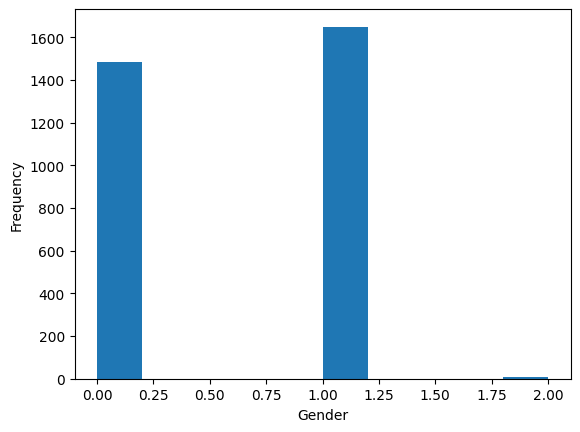

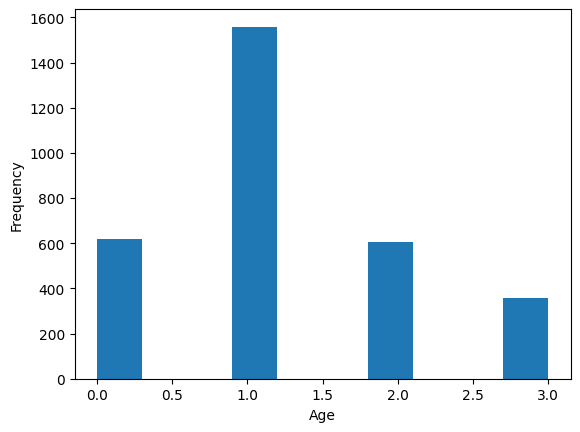

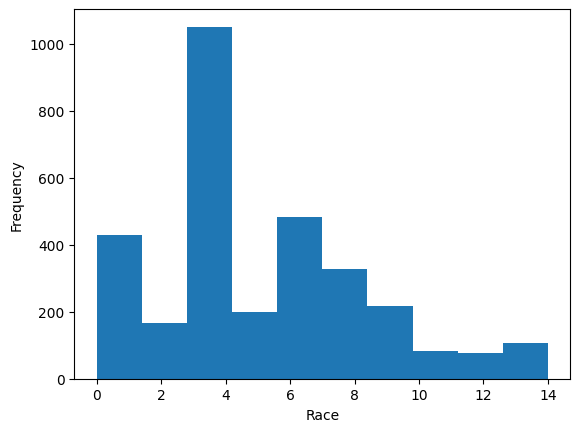

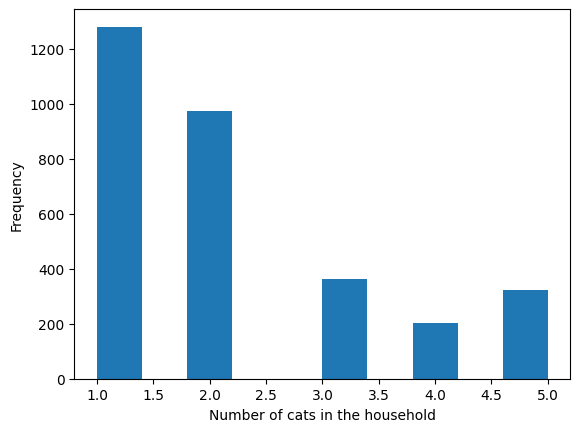

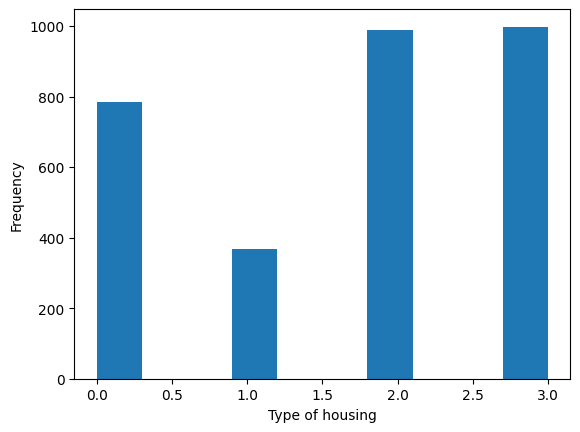

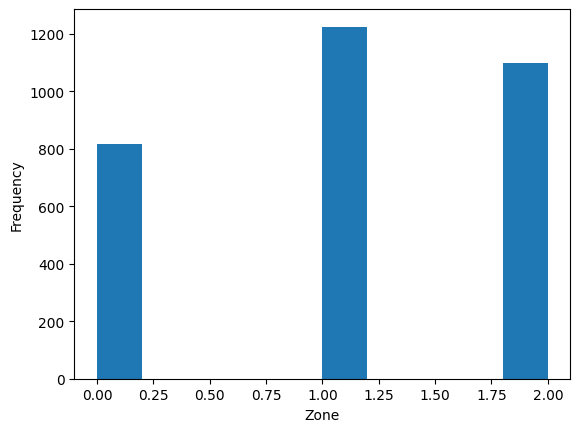

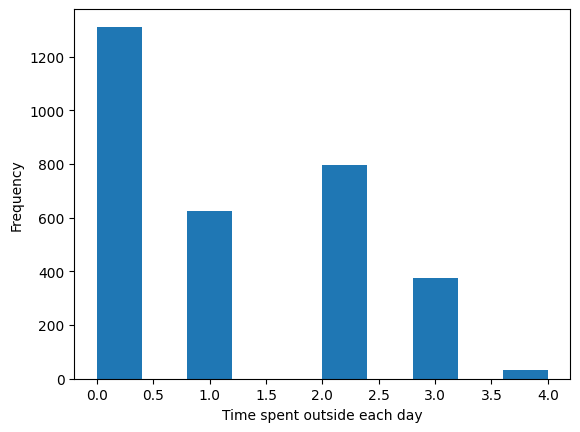

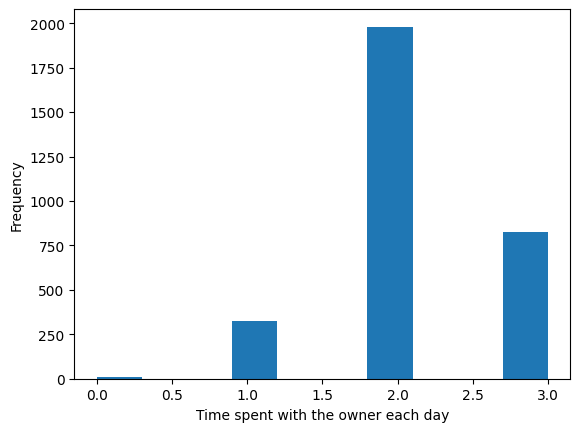

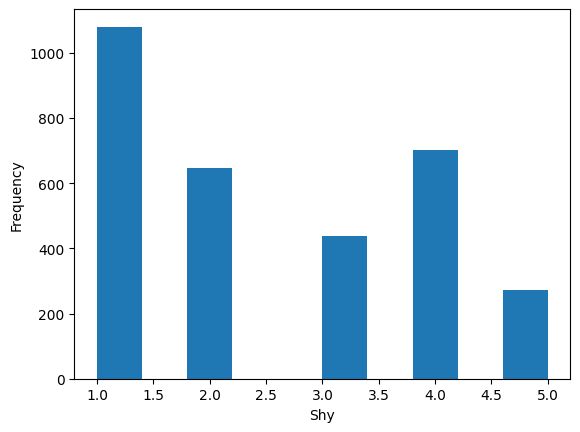

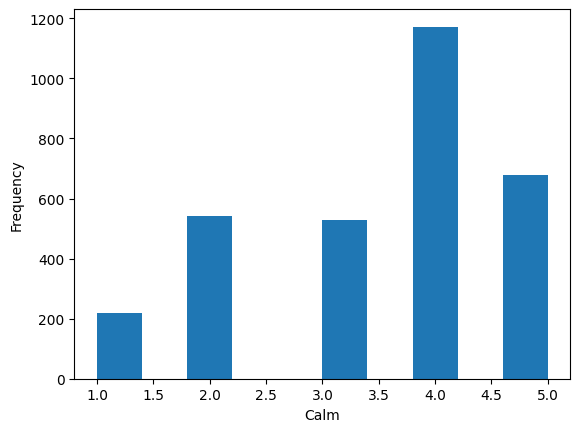

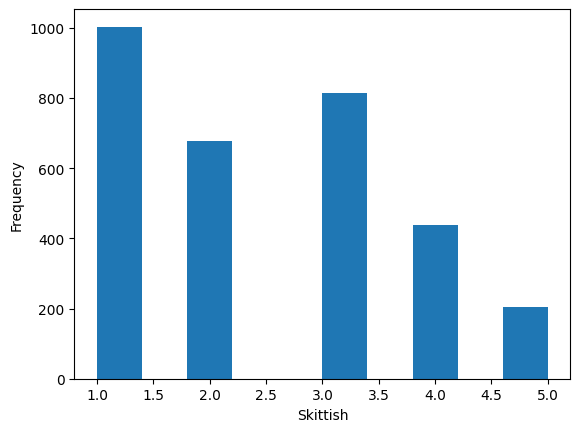

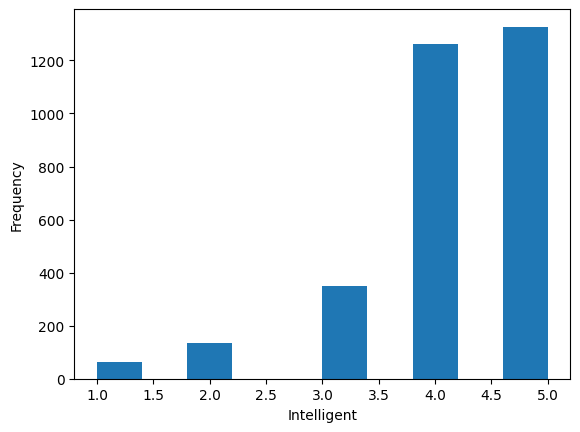

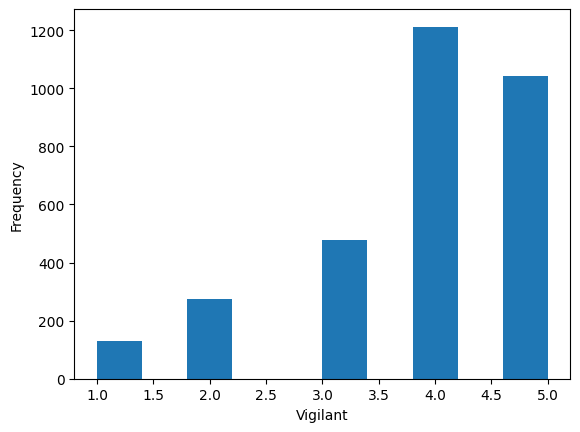

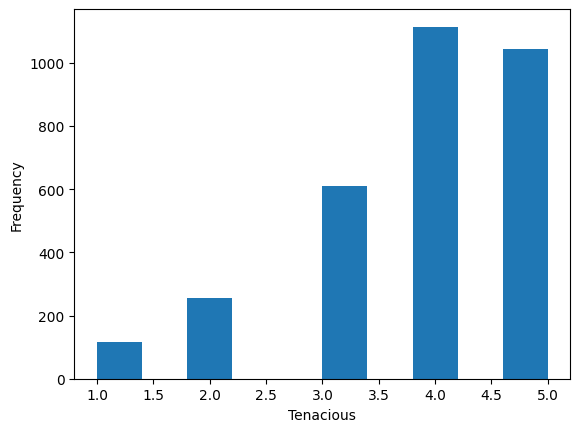

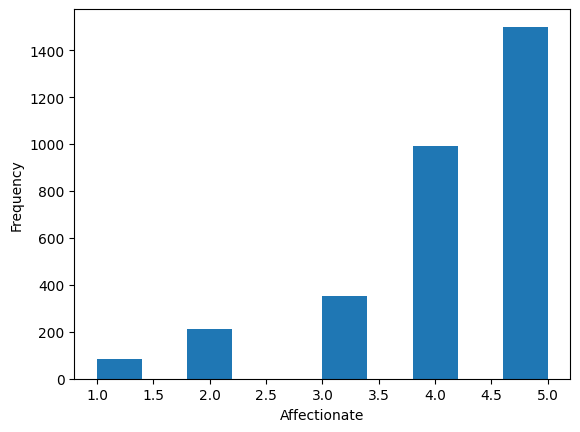

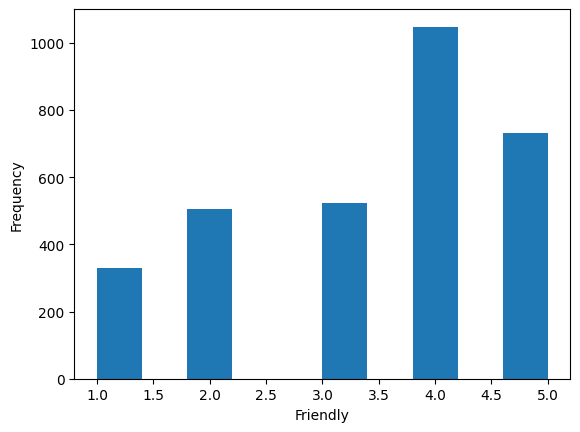

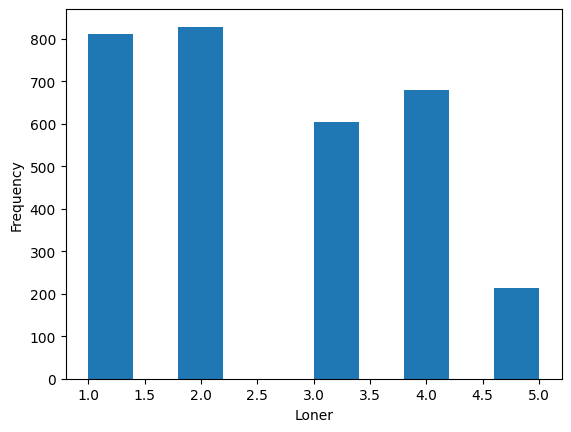

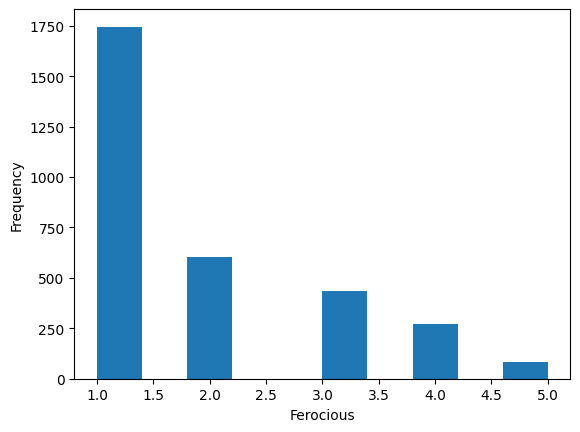

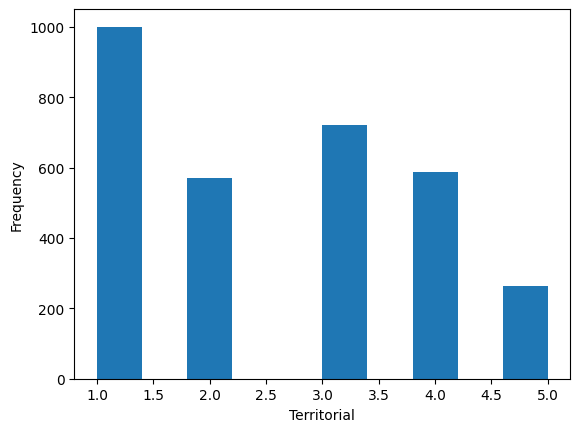

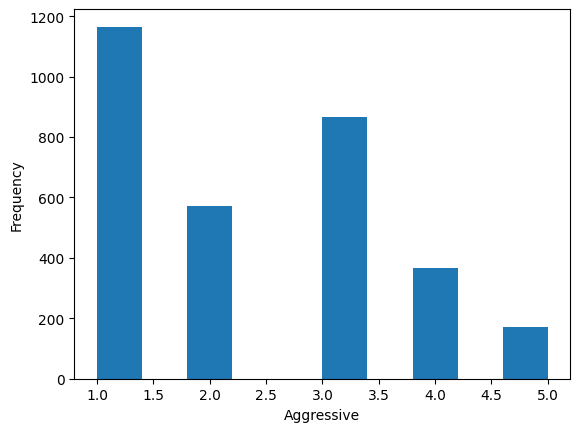

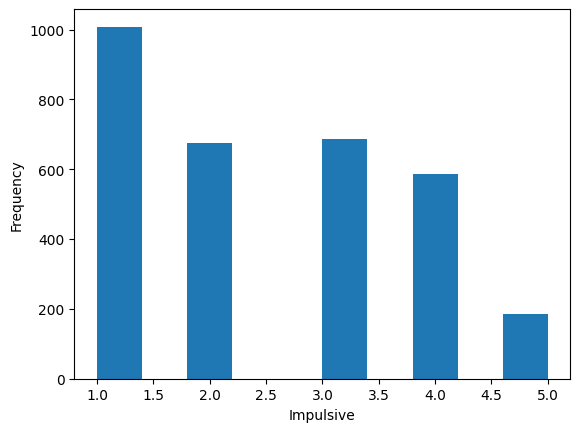

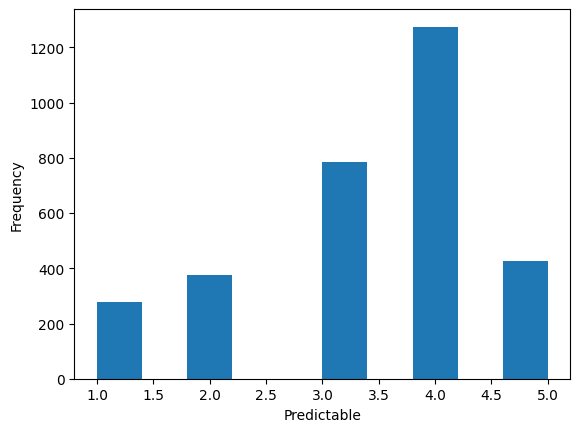

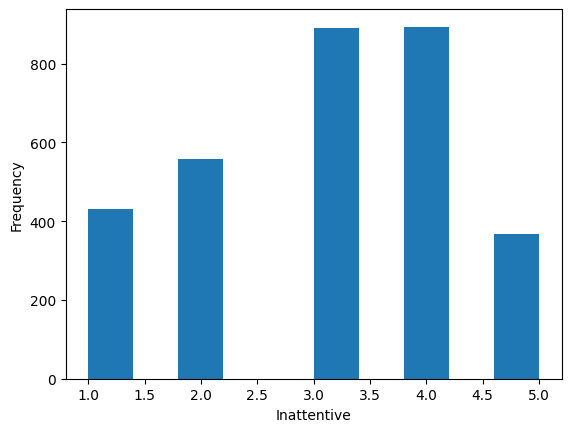

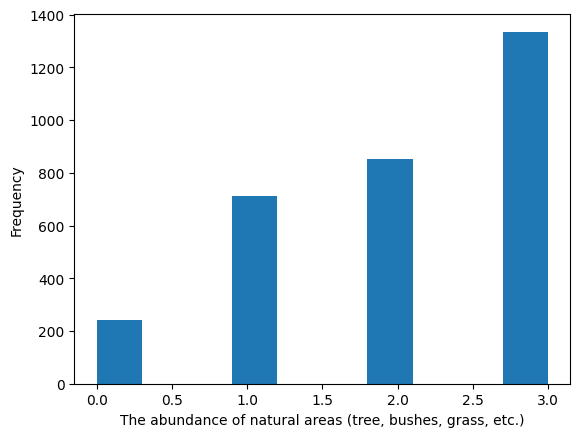

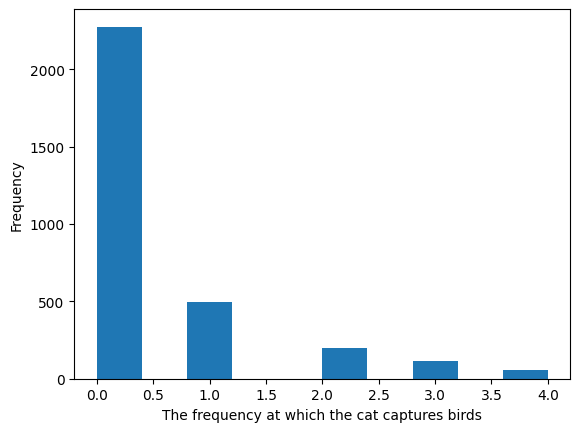

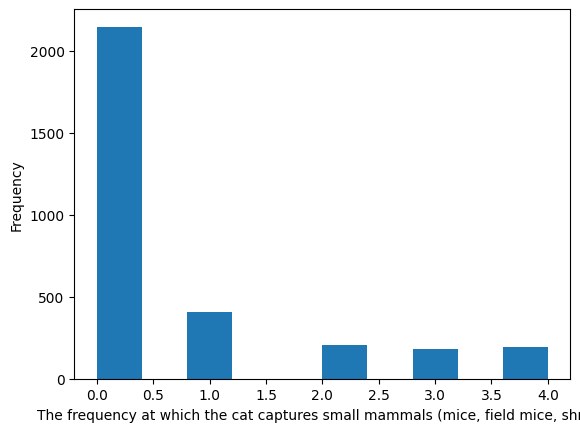

In [287]:
for column in df.columns:
    ax = df[column].plot(kind='hist')

    # Setează eticheta axei Y
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')

    # Afișează graficul
    plt.show()

### Anomalii posibile în histogramă

##### In histogramele de mai sus se observa urmatoarele lucruri:
1. **Valori extreme (outliers)**: Puncte de date care se situează departe de restul valorilor, afectând media și variabilitatea.

2. **Asimetrii**: Distribuția poate fi îndreptată spre stânga (de exemplu la: **The frequency at which the cat captures small mammals (mice, field mice, shrew), The frequency at which the cat captures birds**) sau spre dreapta (de exemplu la: **The abundance of natural areas (tree, bushes, grass, etc.), Affectionate, etc**).

3. **Vârfuri multiple**: Prezența a mai multor vârfuri poate indica subgrupuri distincte(exemplu la: **Loner, Zone**).

4. **Lipsa de date**: Intervalele cu zero frecvențe sugerează absența anumitor valori(exemplu la: **Time spent with the owner each day**)


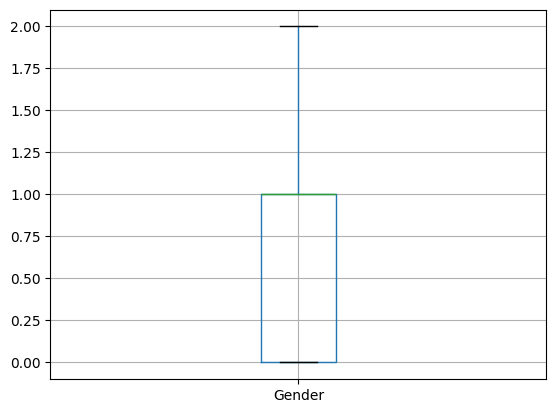

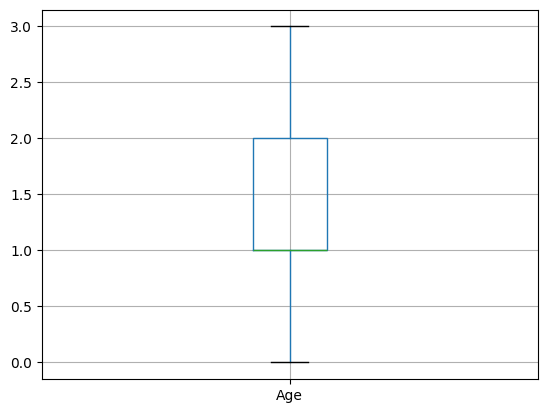

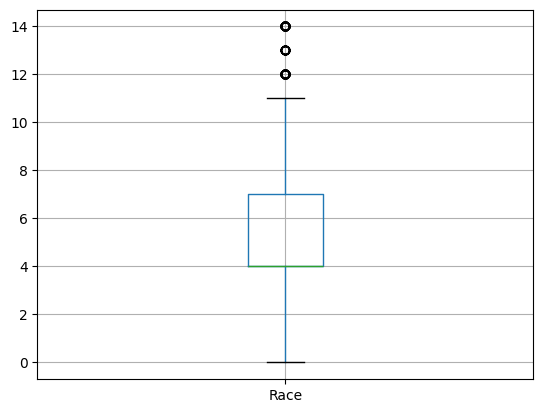

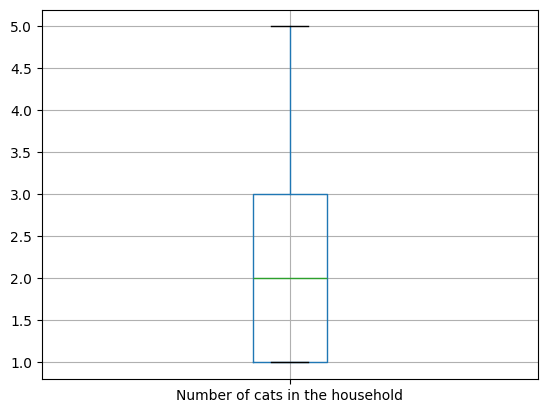

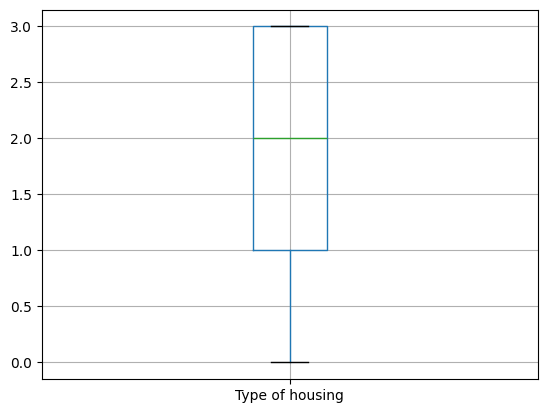

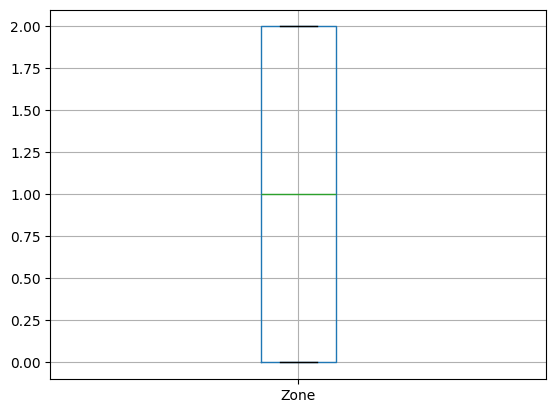

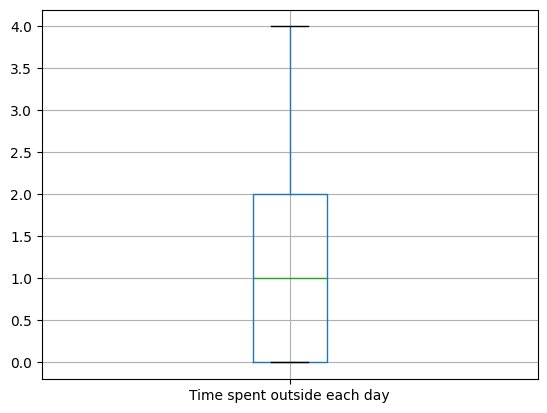

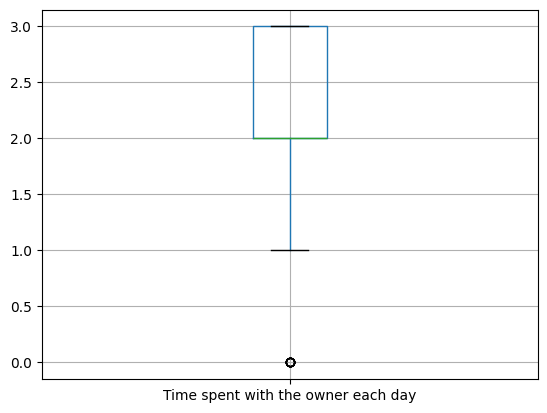

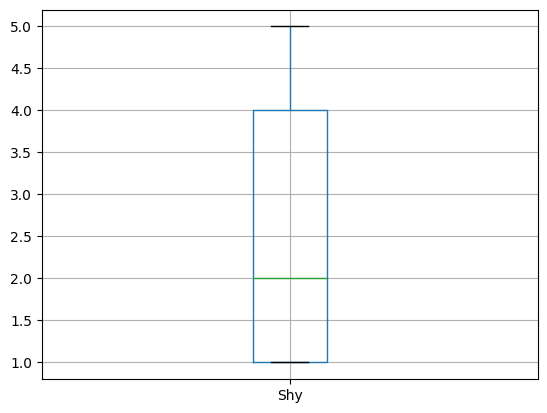

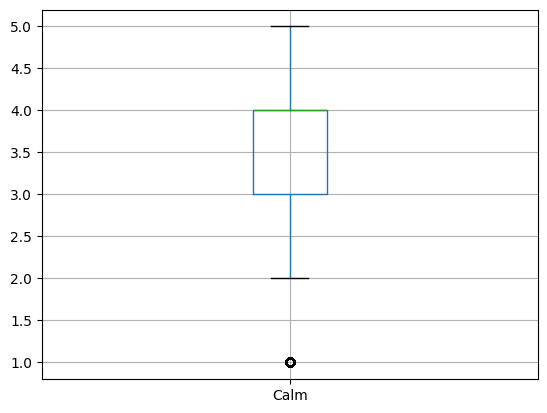

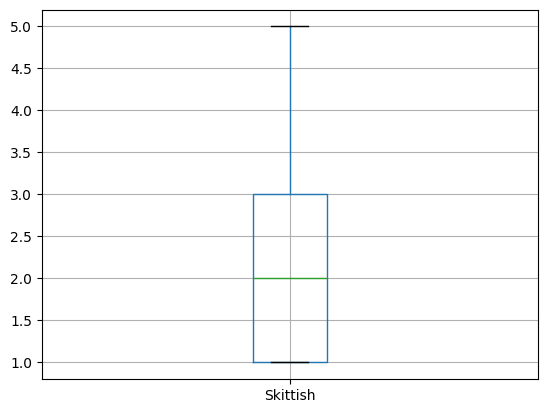

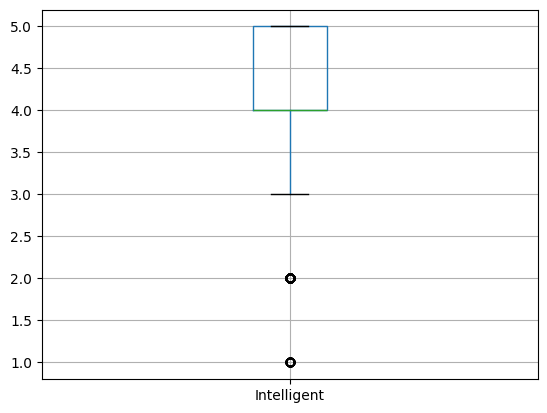

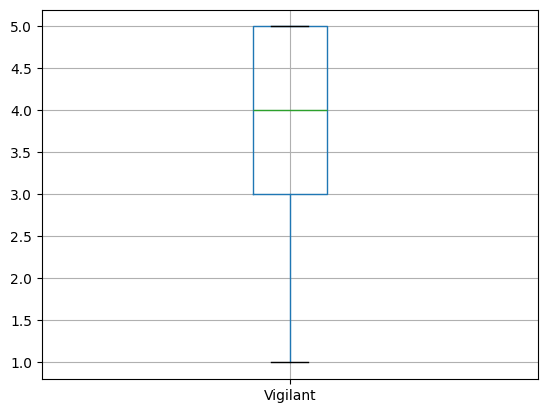

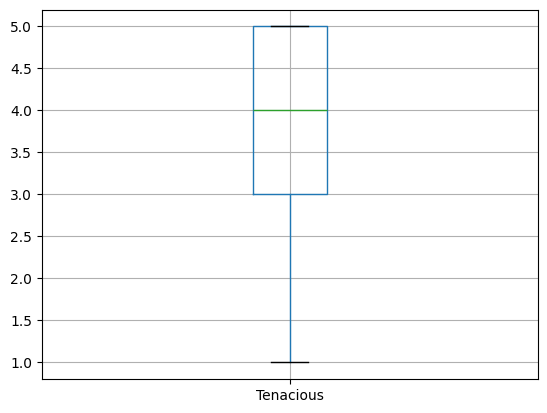

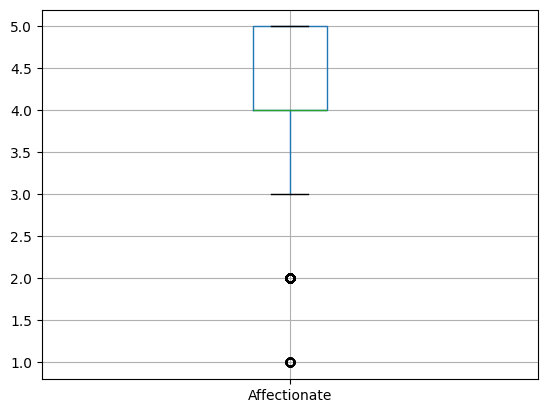

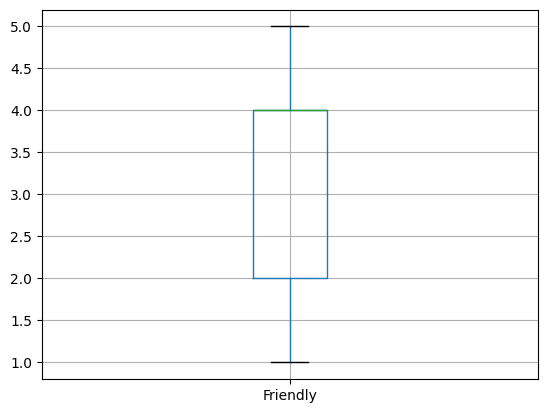

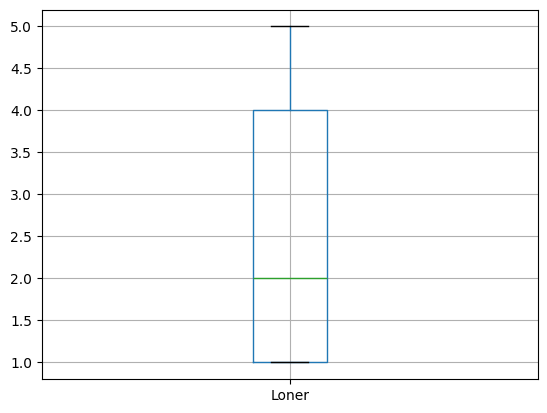

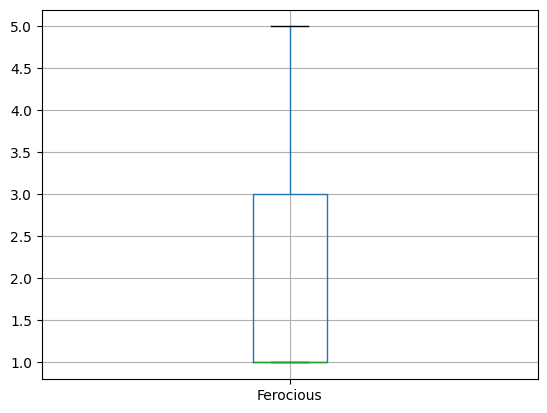

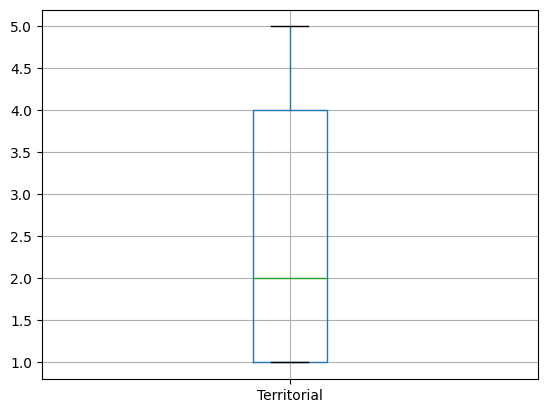

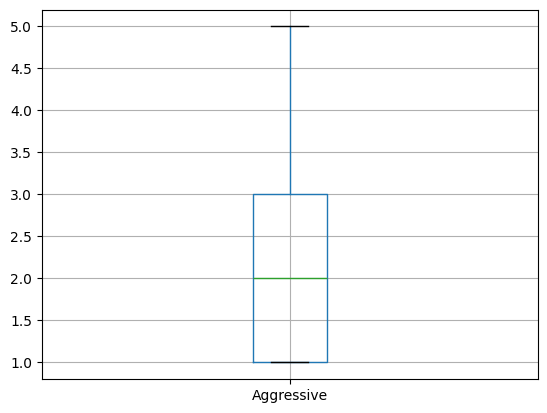

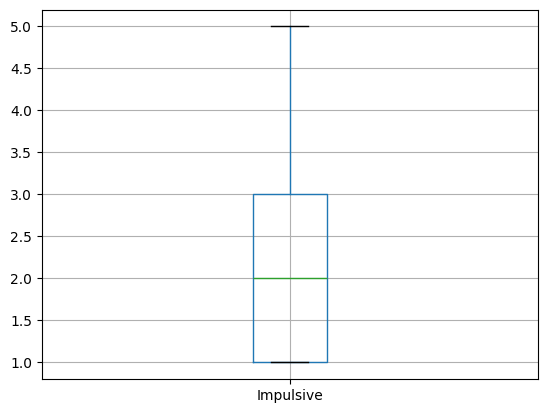

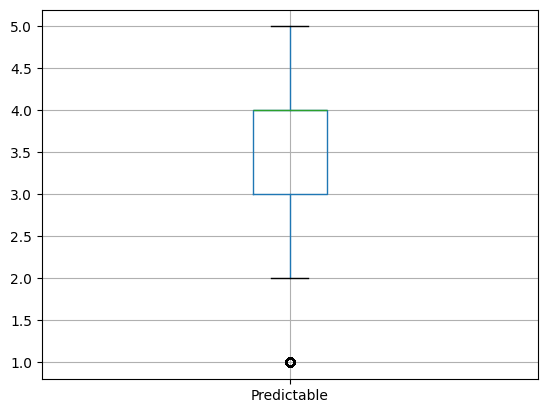

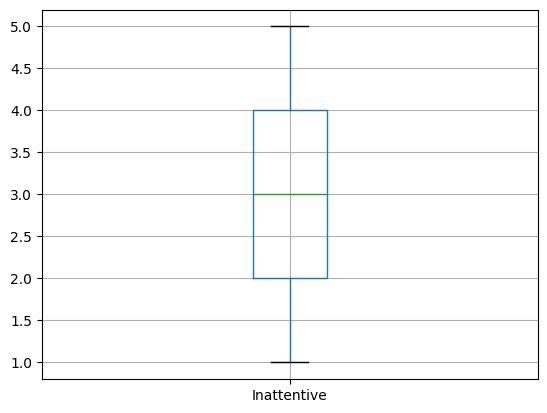

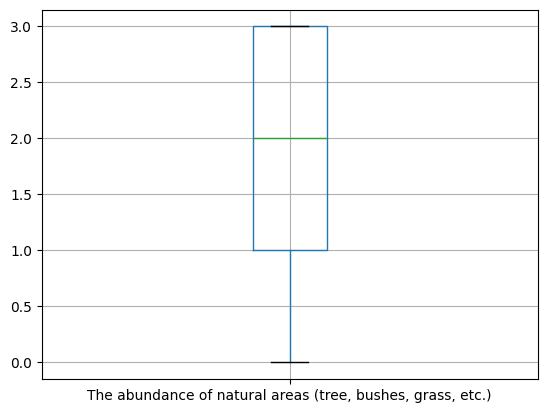

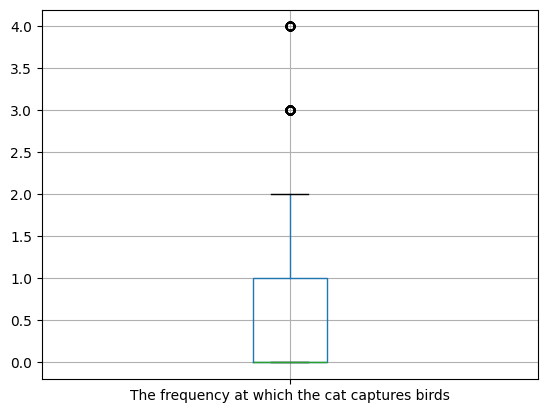

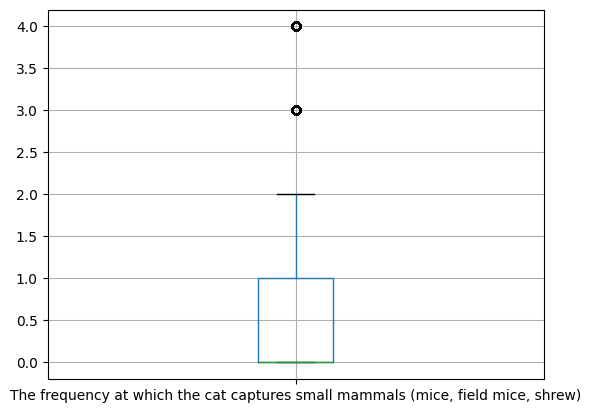

In [288]:
for column in df.columns:
    ax = df.boxplot(column)

    # Afișează graficul
    plt.show()